<a href="https://colab.research.google.com/github/Jyotishman77/Enrolment-UIDAI-/blob/master/ENROLMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')


In [ ]:
df1 = pd.read_csv('/content/api_data_aadhar_enrolment_0_500000.csv')
df2 = pd.read_csv('/content/api_data_aadhar_enrolment_500000_1000000.csv')
df3 = pd.read_csv('/content/api_data_aadhar_enrolment_1000000_1006029.csv')


In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)

print("Combined shape:", df.shape)
df.head()


Combined shape: (772165, 7)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121.0,11.0,61.0,37.0
1,09-03-2025,Karnataka,Bengaluru Urban,560043.0,14.0,33.0,39.0
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001.0,29.0,82.0,12.0
3,09-03-2025,Uttar Pradesh,Aligarh,202133.0,62.0,29.0,15.0
4,09-03-2025,Karnataka,Bengaluru Urban,560016.0,14.0,16.0,21.0


In [ ]:
df.columns = df.columns.str.strip().str.lower()


In [ ]:
columns = ['date', 'state', 'district', 'pincode',
           'age_0_5', 'age_5_17', 'age_18_greater']
print(columns)

['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']


In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']
df[age_cols] = df[age_cols].fillna(0)


In [ ]:
df['total_population'] = df['age_0_5'] + df['age_5_17'] + df['age_18_greater']


In [ ]:
df['dependency_ratio'] = (
    df['age_0_5'] + df['age_5_17']
) / df['age_18_greater'].replace(0, np.nan)


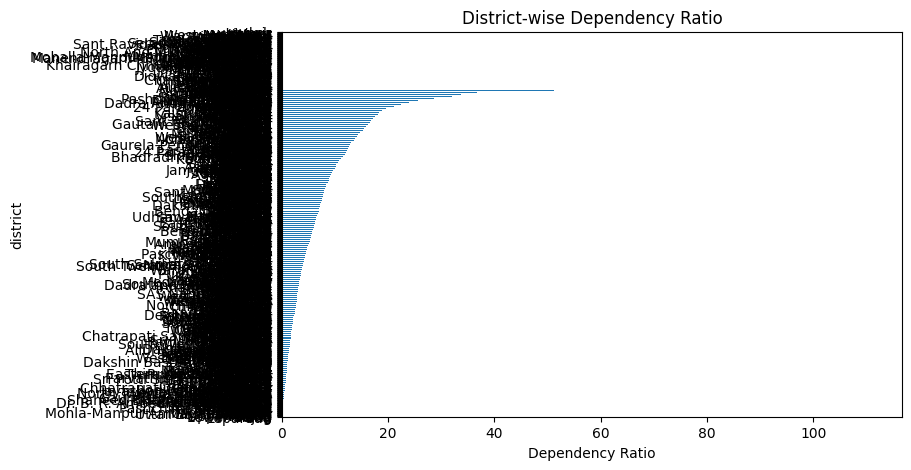

In [ ]:
df.groupby('district')['dependency_ratio'].mean().sort_values().plot(
    kind='barh',
    figsize=(8,5),
    title='District-wise Dependency Ratio'
)

plt.xlabel('Dependency Ratio')
plt.show()


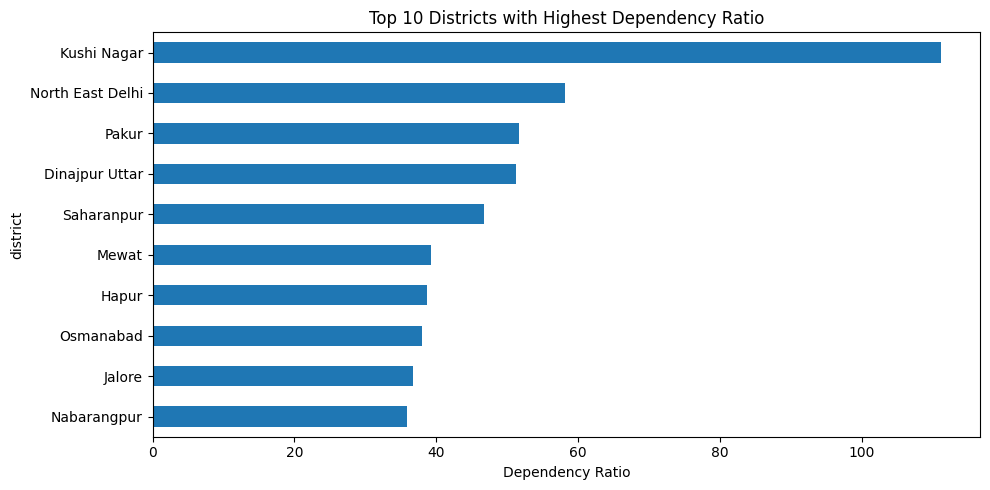

In [ ]:
top_districts = (
    df.groupby('district')['dependency_ratio']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
top_districts.plot(
    kind='barh',
    title='Top 10 Districts with Highest Dependency Ratio'
)
plt.xlabel('Dependency Ratio')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


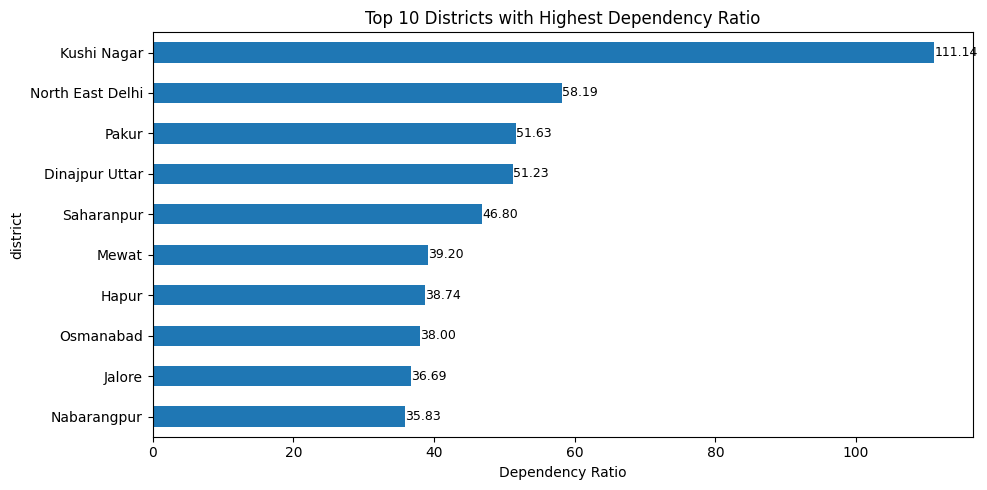

In [ ]:
top_districts = (
    df.groupby('district')['dependency_ratio']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
ax = top_districts.plot(
    kind='barh',
    title='Top 10 Districts with Highest Dependency Ratio'
)

plt.xlabel('Dependency Ratio')
plt.gca().invert_yaxis()

# Add exact value labels
for i, v in enumerate(top_districts):
    ax.text(
        v + 0.01,      # slightly to the right of bar
        i,
        f"{v:.2f}",    # show exact value (2 decimals)
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()


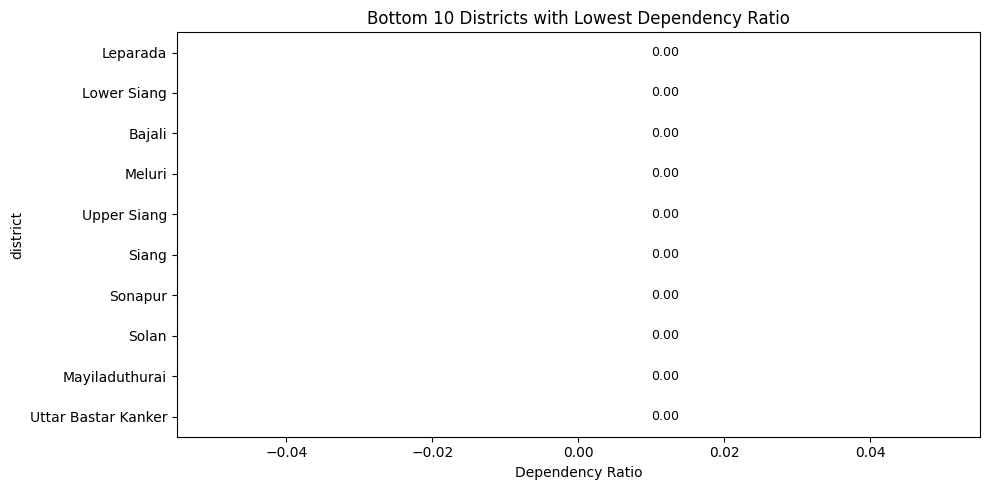

In [ ]:
bottom_districts = (
    df.groupby('district')['dependency_ratio']
      .mean()
      .sort_values()
      .head(10)
)

plt.figure(figsize=(10,5))
ax = bottom_districts.plot(
    kind='barh',
    title='Bottom 10 Districts with Lowest Dependency Ratio'
)

plt.xlabel('Dependency Ratio')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(bottom_districts):
    ax.text(
        v + 0.01,   # position slightly right of bar
        i,
        f"{v:.2f}", # format to 2 decimals
        va='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()


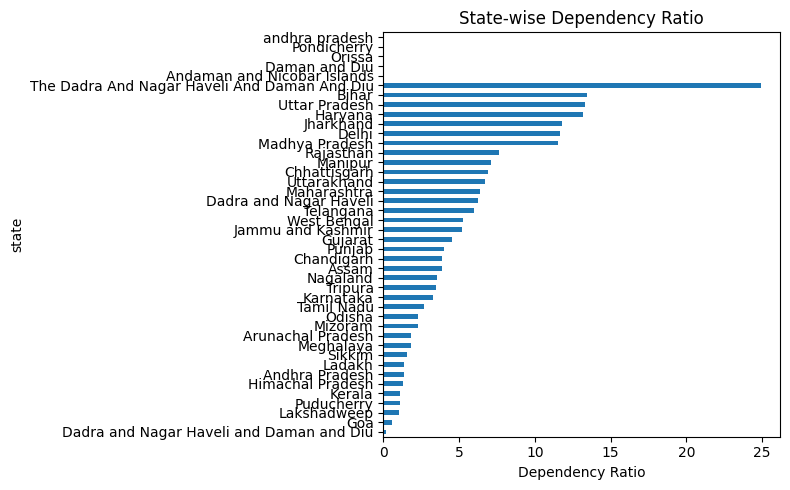

In [ ]:
df.groupby('state')['dependency_ratio'].mean() \
  .sort_values() \
  .plot(
      kind='barh',
      figsize=(8,5),
      title='State-wise Dependency Ratio'
  )

plt.xlabel('Dependency Ratio')
plt.tight_layout()
plt.show()


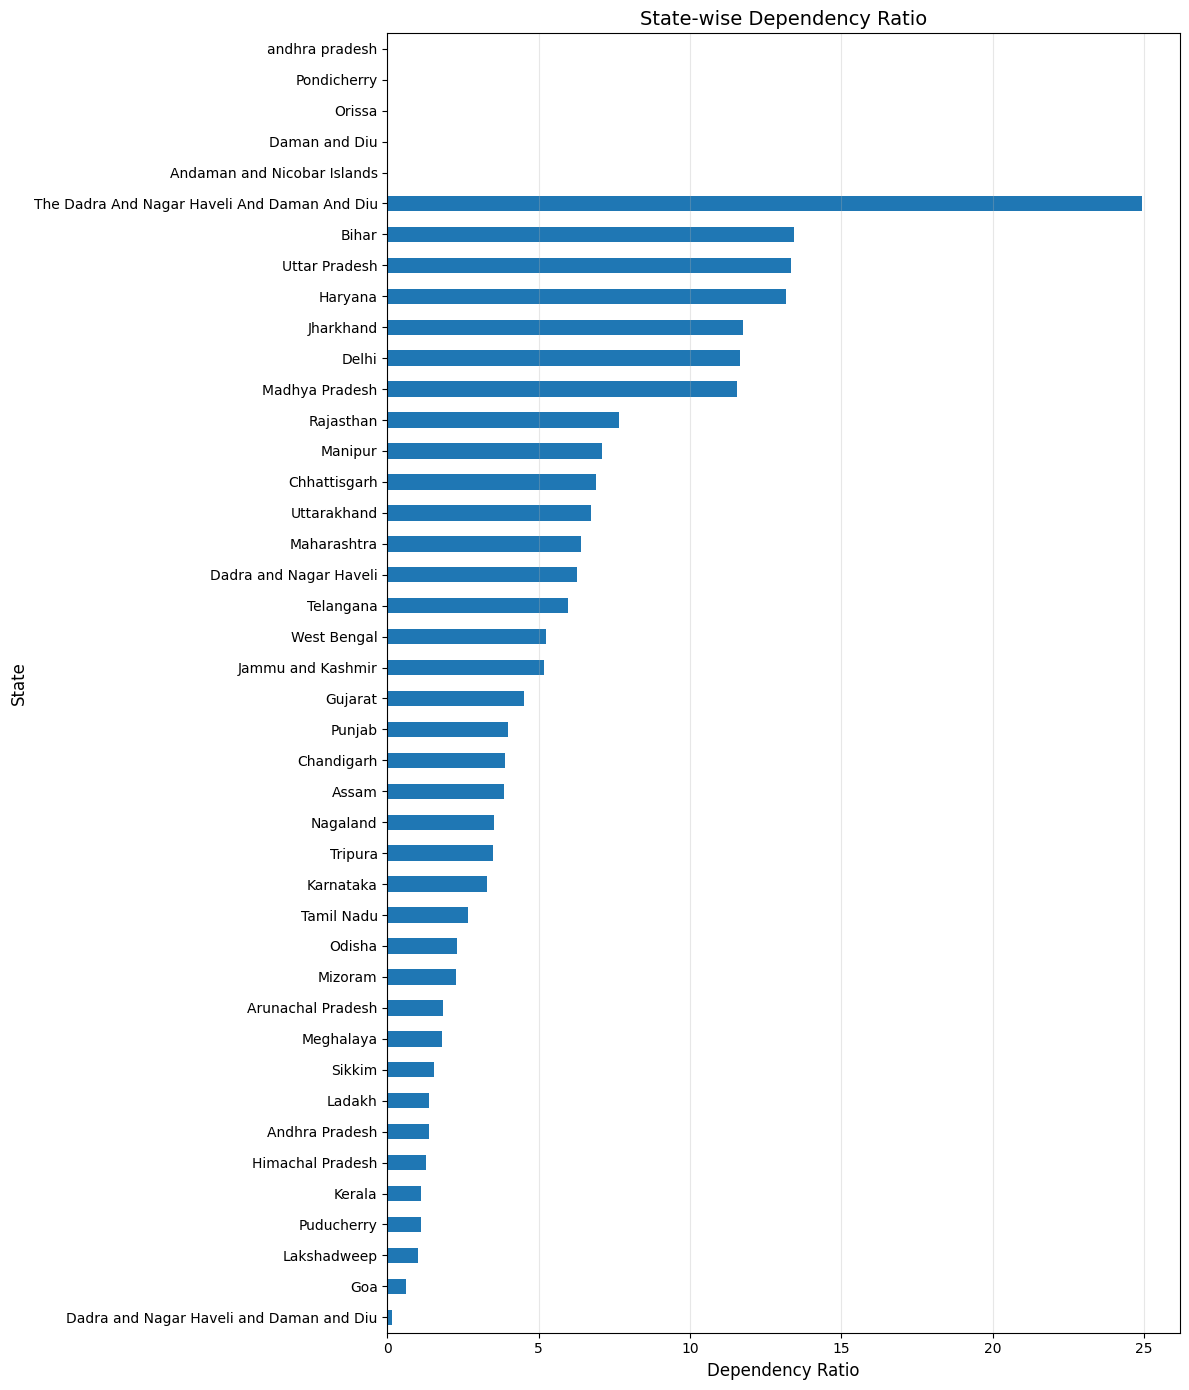

In [ ]:
plt.figure(figsize=(12, 14))  # width, height (increase height for many states)

df.groupby('state')['dependency_ratio'].mean() \
  .sort_values() \
  .plot(
      kind='barh'
  )

plt.xlabel('Dependency Ratio', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('State-wise Dependency Ratio', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
state_metrics = df.groupby('state').agg({
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum'
})

state_metrics['dependency_ratio'] = (
    state_metrics['age_0_5'] + state_metrics['age_5_17']
) / state_metrics['age_18_greater'].replace(0, np.nan)

state_metrics = state_metrics.sort_values(
    'dependency_ratio',
    ascending=False
)


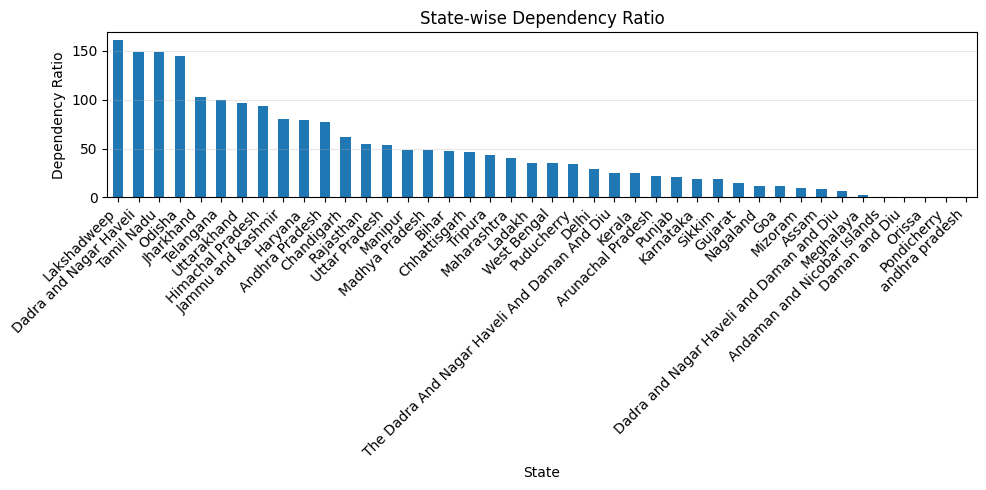

In [ ]:
plt.figure(figsize=(10,5))

state_metrics['dependency_ratio'].plot(
    kind='bar',
    title='State-wise Dependency Ratio',
)

plt.ylabel('Dependency Ratio')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


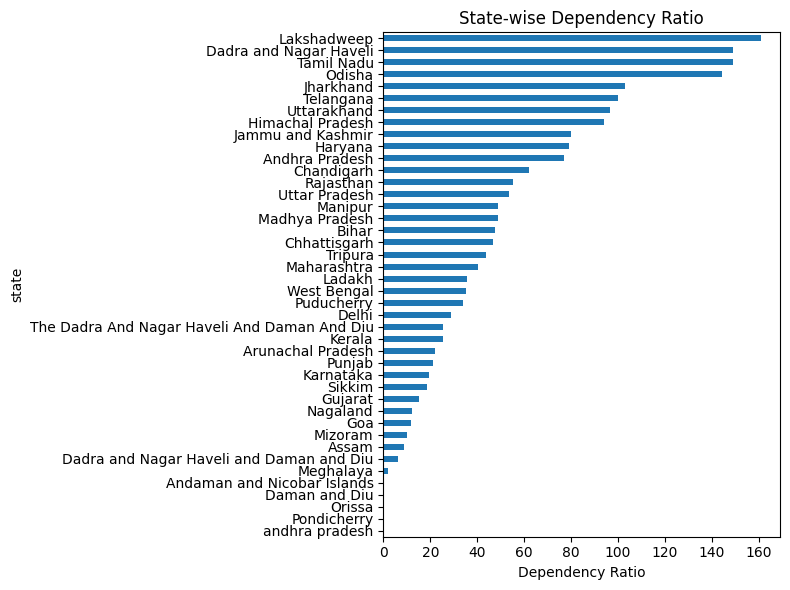

In [ ]:
plt.figure(figsize=(8,6))

state_metrics['dependency_ratio'].plot(
    kind='barh',
)

plt.xlabel('Dependency Ratio')
plt.title('State-wise Dependency Ratio')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
school_age = df.groupby('district')['age_5_17'].sum().sort_values()


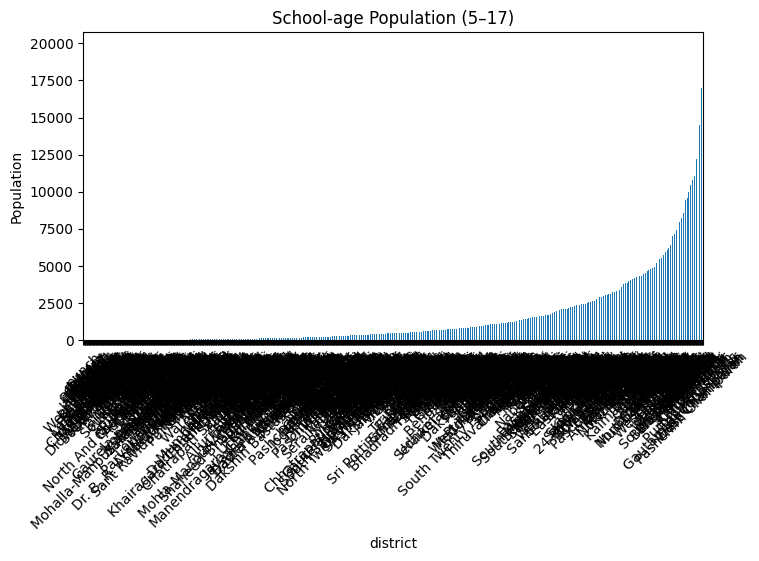

In [ ]:
school_age.plot(
    kind='bar',
    figsize=(8,4),
    title='School-age Population (5–17)'
)

plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()


In [ ]:
school_age_state = df.groupby('state')['age_5_17'].sum()


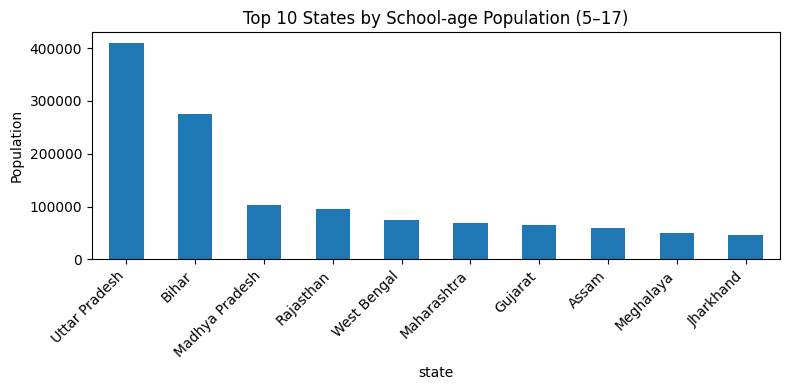

In [ ]:
top_10_states_school = school_age_state.sort_values(ascending=False).head(10)

top_10_states_school.plot(
    kind='bar',
    figsize=(8,4),
    title='Top 10 States by School-age Population (5–17)'
)

plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


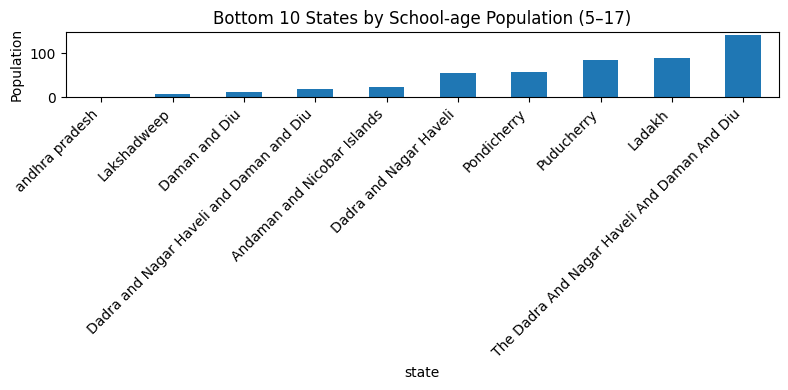

In [ ]:
bottom_10_states_school = school_age_state.sort_values(ascending=True).head(10)

bottom_10_states_school.plot(
    kind='bar',
    figsize=(8,4),
    title='Bottom 10 States by School-age Population (5–17)'
)

plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


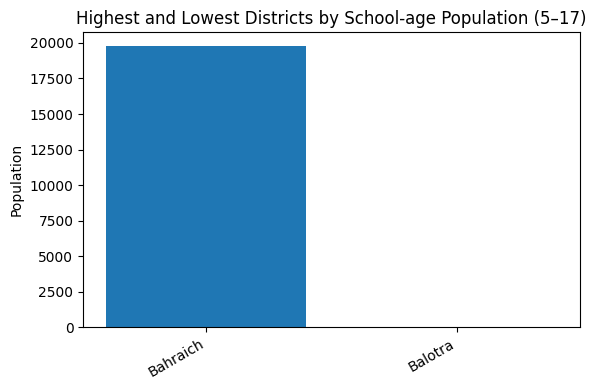

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(
    [highest_district, lowest_district],
    [highest_value, lowest_value]
)

plt.title('Highest and Lowest Districts by School-age Population (5–17)')
plt.ylabel('Population')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
sorted_school = school_age_district.sort_values()
second_lowest_district = sorted_school.index[1]
second_lowest_value = sorted_school.iloc[1]

print(
    f"Second lowest district ({second_lowest_district}) has approximately "
    f"{second_lowest_value:,} school-age (5–17) children."
)


Second lowest district (chittoor) has approximately 0.0 school-age (5–17) children.


In [ ]:
# Aggregate school-age population by district
school_age_district = (
    df.groupby('district')['age_5_17']
      .sum()
)

# Highest district
highest_district = school_age_district.idxmax()
highest_value = school_age_district.max()

print(
    f"Highest district ({highest_district}) has "
    f"{highest_value:,} school-age (5–17) children."
)


Highest district (Bahraich) has 19,757.0 school-age (5–17) children.


In [ ]:
school_age_district = (
    df.groupby('district')['age_5_17']
      .sum()
)


In [ ]:
highest_district = school_age_district.idxmax()
lowest_district = school_age_district.idxmin()

highest_value = school_age_district.max()
lowest_value = school_age_district.min()


In [ ]:
child_0_5 = df.groupby('district')['age_0_5'].sum()


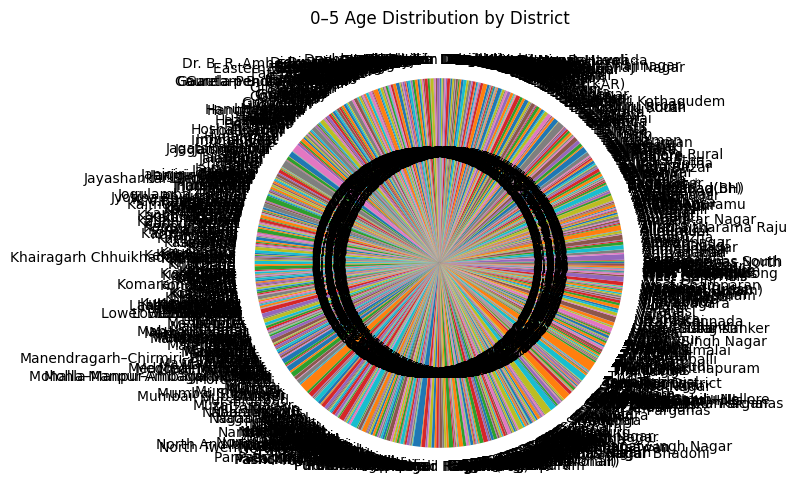

In [ ]:
child_0_5.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title='0–5 Age Distribution by District'
)

plt.ylabel('')
plt.show()


In [ ]:
# Identify highest and lowest districts
highest_district = child_0_5.idxmax()
lowest_district = child_0_5.idxmin()

highest_value = child_0_5.max()
lowest_value = child_0_5.min()


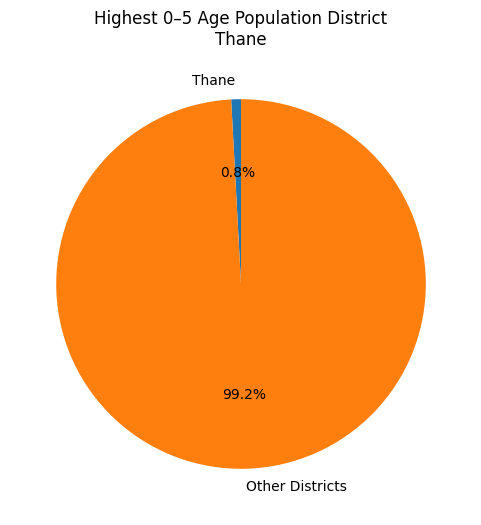

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(
    [highest_value, child_0_5.sum() - highest_value],
    labels=[highest_district, 'Other Districts'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title(f'Highest 0–5 Age Population District\n{highest_district}')
plt.show()


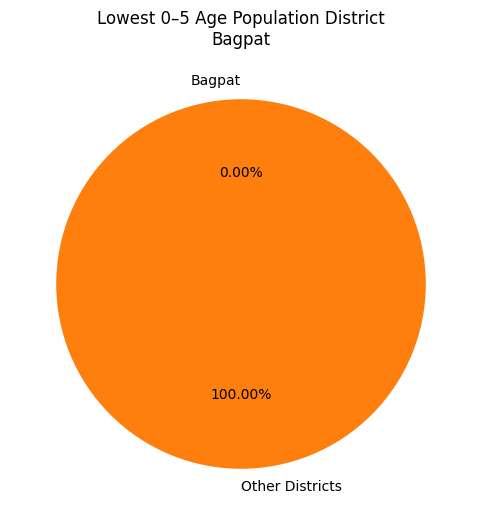

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(
    [lowest_value, child_0_5.sum() - lowest_value],
    labels=[lowest_district, 'Other Districts'],
    autopct='%1.2f%%',
    startangle=90
)
plt.title(f'Lowest 0–5 Age Population District\n{lowest_district}')
plt.show()


In [ ]:
# Sort districts by 0–5 population
sorted_child = child_0_5.sort_values()

# Get 2nd lowest
second_lowest_district = sorted_child.index[1]
second_lowest_value = sorted_child.iloc[1]


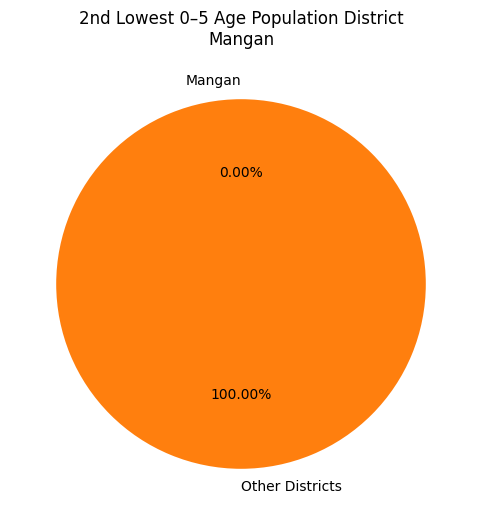

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(
    [second_lowest_value, child_0_5.sum() - second_lowest_value],
    labels=[second_lowest_district, 'Other Districts'],
    autopct='%1.2f%%',
    startangle=90
)
plt.title(f'2nd Lowest 0–5 Age Population District\n{second_lowest_district}')
plt.show()


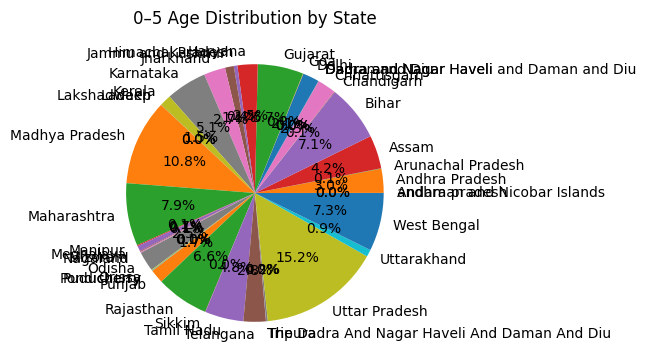

In [ ]:
child_0_5_state = df.groupby('state')['age_0_5'].sum()

child_0_5_state.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title='0–5 Age Distribution by State'
)

plt.ylabel('')
plt.tight_layout()
plt.show()



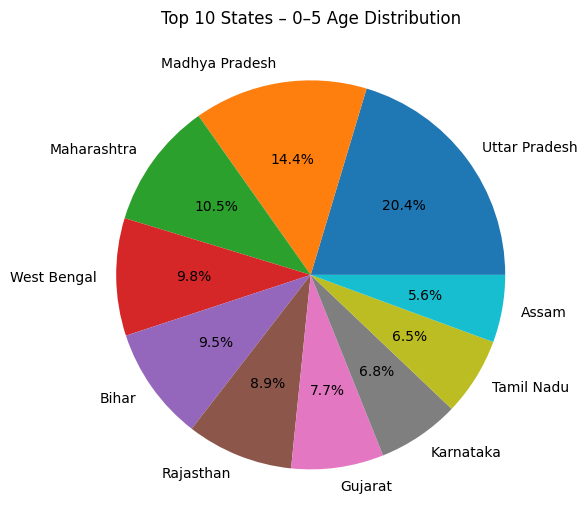

In [ ]:
top_n = 10

child_0_5_state \
    .sort_values(ascending=False) \
    .head(top_n) \
    .plot(
        kind='pie',
        autopct='%1.1f%%',
        figsize=(6,6),
        title='Top 10 States – 0–5 Age Distribution'
    )

plt.ylabel('')
plt.tight_layout()
plt.show()


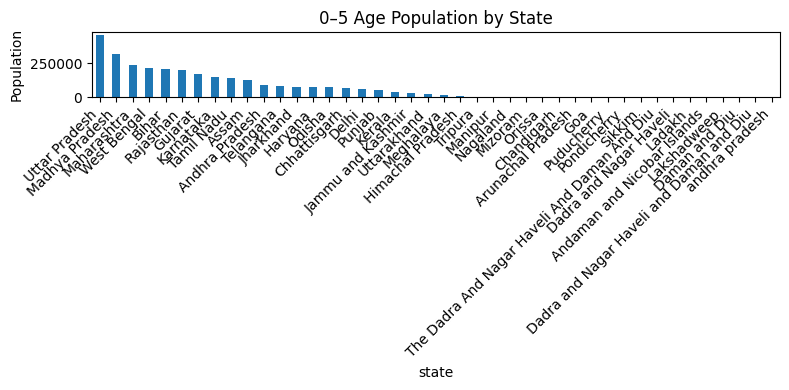

In [ ]:
child_0_5_state.sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,4),
    title='0–5 Age Population by State'
)

plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


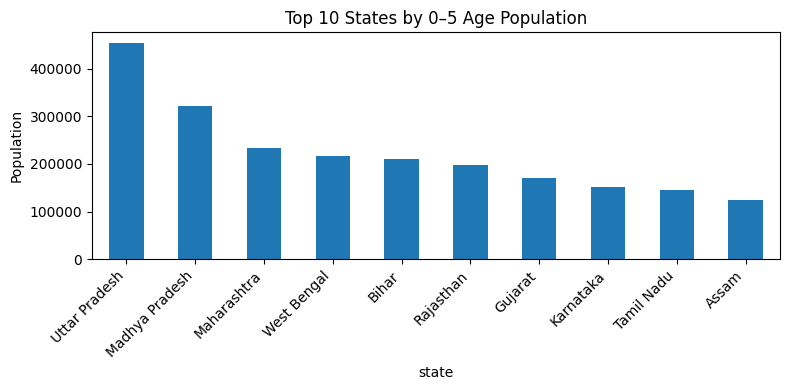

In [ ]:
top_10_states_child = child_0_5_state.sort_values(ascending=False).head(10)

top_10_states_child.plot(
    kind='bar',
    figsize=(8,4),
    title='Top 10 States by 0–5 Age Population'
)

plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


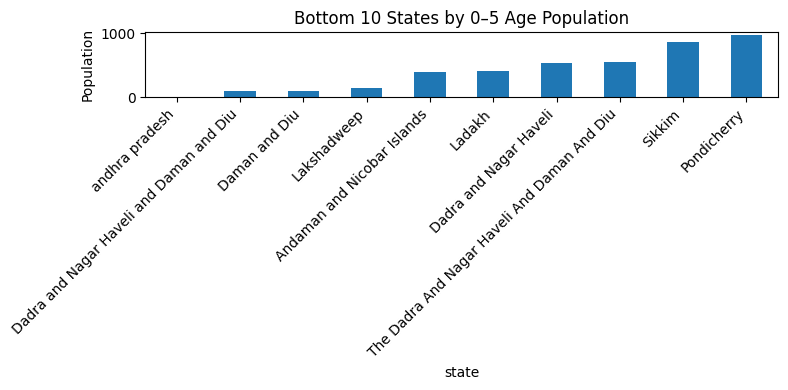

In [ ]:
bottom_10_states_child = child_0_5_state.sort_values(ascending=True).head(10)

bottom_10_states_child.plot(
    kind='bar',
    figsize=(8,4),
    title='Bottom 10 States by 0–5 Age Population'
)

plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
adult_trend = df.groupby('date')['age_18_greater'].sum()


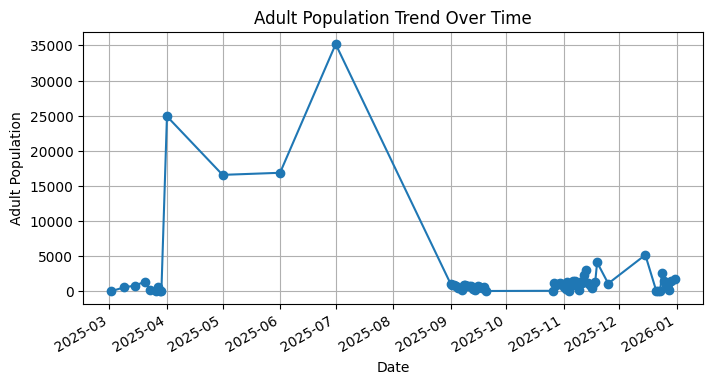

In [ ]:
adult_trend.plot(
    marker='o',
    figsize=(8,4),
    title='Adult Population Trend Over Time'
)

plt.xlabel('Date')
plt.ylabel('Adult Population')
plt.grid(True)
plt.show()


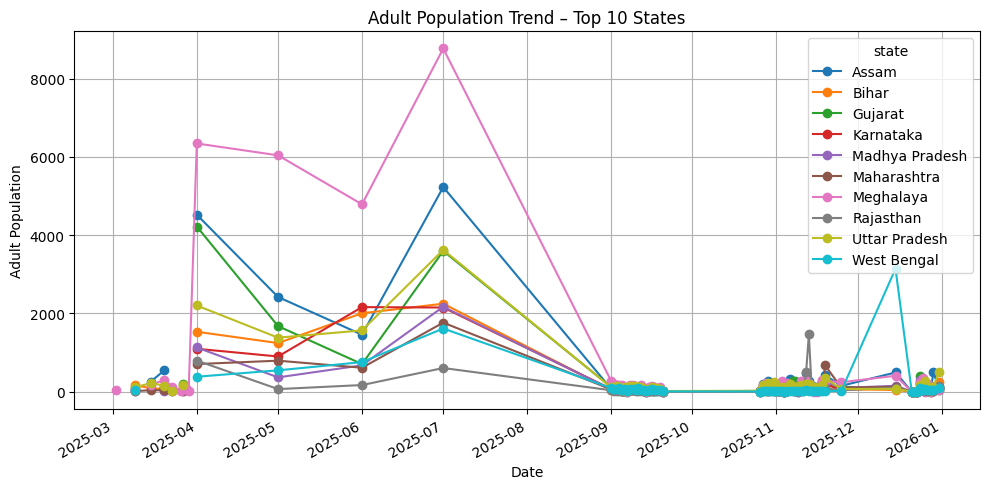

In [ ]:
# Top 10 states by total adult population
top_states = (
    df.groupby('state')['age_18_greater']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .index
)

top_states_trend = (
    df[df['state'].isin(top_states)]
    .groupby(['date','state'])['age_18_greater']
    .sum()
    .unstack()
)

top_states_trend.plot(
    figsize=(10,5),
    marker='o',
    title='Adult Population Trend – Top 10 States'
)

plt.xlabel('Date')
plt.ylabel('Adult Population')
plt.grid(True)
plt.tight_layout()
plt.show()


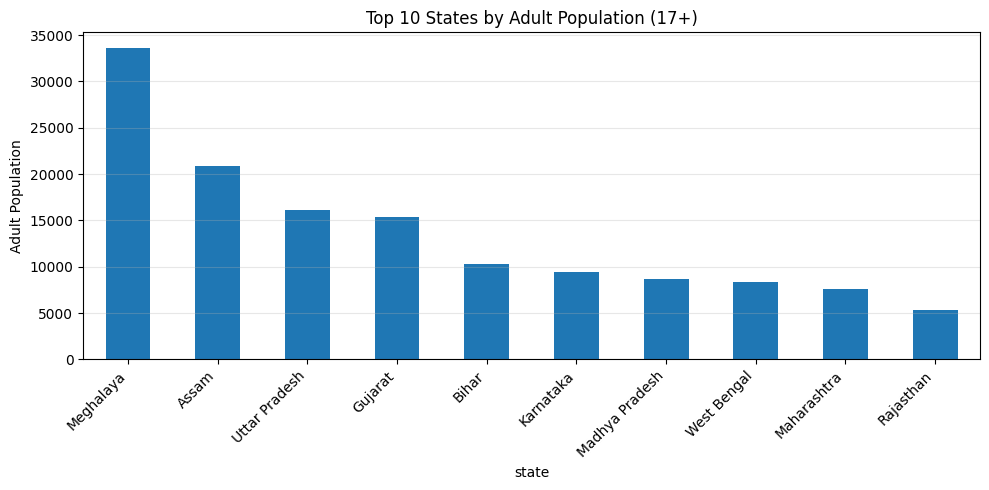

In [ ]:
top_10_states = (
    df.groupby('state')['age_18_greater']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
top_10_states.plot(
    kind='bar',
    title='Top 10 States by Adult Population (17+)'
)

plt.ylabel('Adult Population')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


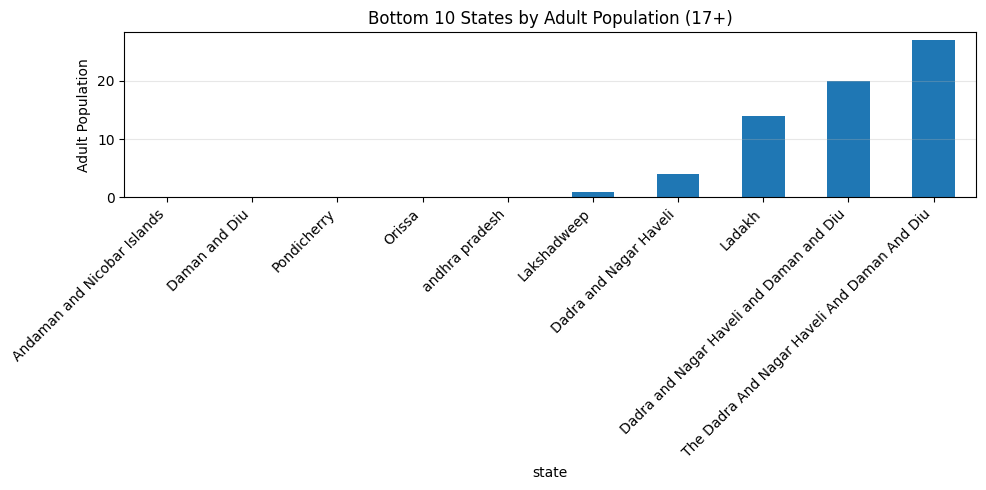

In [ ]:
bottom_10_states = (
    df.groupby('state')['age_18_greater']
      .sum()
      .sort_values()
      .head(10)
)

plt.figure(figsize=(10,5))
bottom_10_states.plot(
    kind='bar',
    title='Bottom 10 States by Adult Population (17+)'
)

plt.ylabel('Adult Population')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


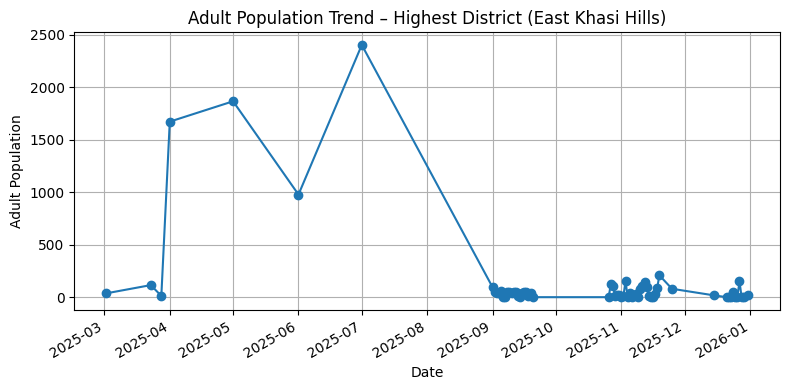

In [ ]:
highest_district = (
    df.groupby('district')['age_18_greater']
      .sum()
      .idxmax()
)

highest_district_trend = (
    df[df['district'] == highest_district]
    .groupby('date')['age_18_greater']
    .sum()
)

highest_district_trend.plot(
    figsize=(8,4),
    marker='o',
    title=f'Adult Population Trend – Highest District ({highest_district})'
)

plt.xlabel('Date')
plt.ylabel('Adult Population')
plt.grid(True)
plt.tight_layout()
plt.show()


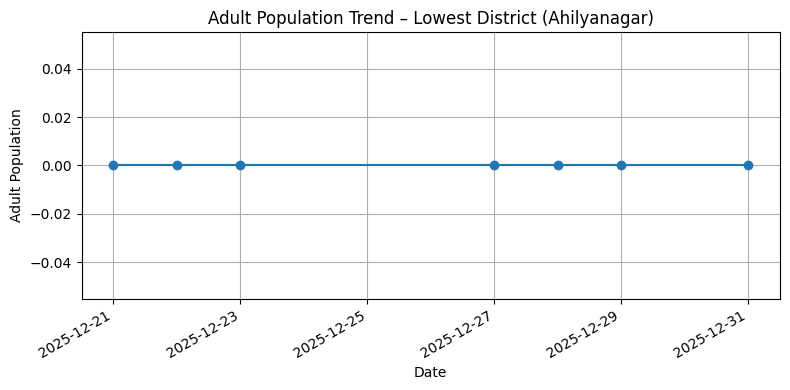

In [ ]:
lowest_district = (
    df.groupby('district')['age_18_greater']
      .sum()
      .idxmin()
)

lowest_district_trend = (
    df[df['district'] == lowest_district]
    .groupby('date')['age_18_greater']
    .sum()
)

lowest_district_trend.plot(
    figsize=(8,4),
    marker='o',
    title=f'Adult Population Trend – Lowest District ({lowest_district})'
)

plt.xlabel('Date')
plt.ylabel('Adult Population')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Total adult population by district
district_adult = (
    df.groupby('district')['age_18_greater']
      .sum()
)

# Highest district and exact value
highest_district = district_adult.idxmax()
highest_value = district_adult.max()

print(
    f"Highest adult (17+) population district: {highest_district}\n"
    f"Total adult population: {highest_value:,}"
)


Highest adult (17+) population district: East Khasi Hills
Total adult population: 9,433.0


In [ ]:
df['stress_index'] = (
    df['age_0_5'] + df['age_5_17']
) / df['total_population'].replace(0, np.nan)


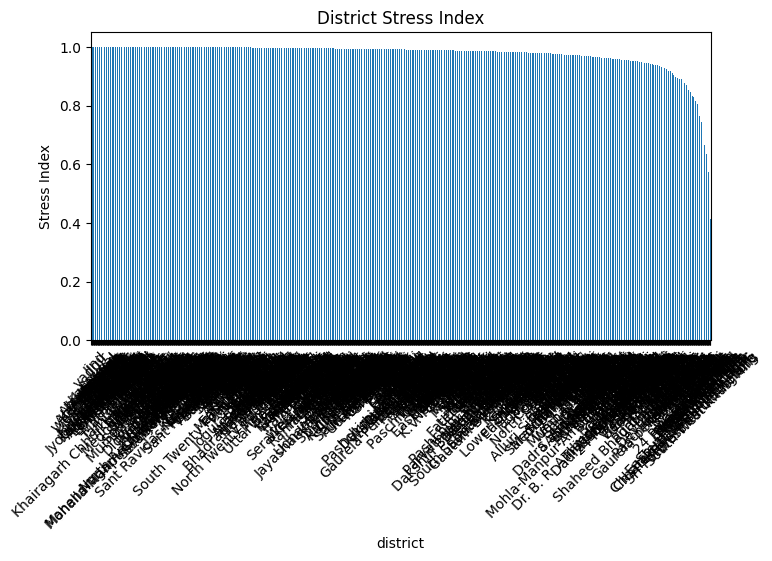

In [ ]:
df.groupby('district')['stress_index'].mean().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,4),
    title='District Stress Index'
)

plt.ylabel('Stress Index')
plt.xticks(rotation=45)
plt.show()


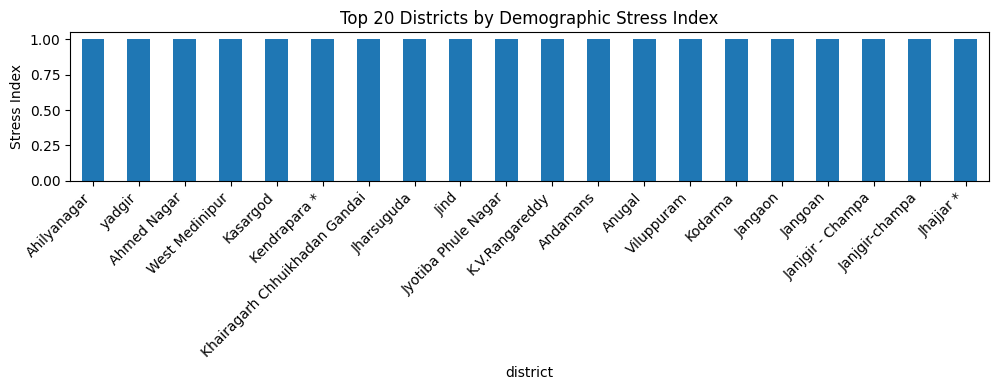

In [ ]:
top_20_districts = (
    df.groupby('district')['stress_index']
      .mean()
      .sort_values(ascending=False)
      .head(20)
)

top_20_districts.plot(
    kind='bar',
    figsize=(10,4),
    title='Top 20 Districts by Demographic Stress Index'
)

plt.ylabel('Stress Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


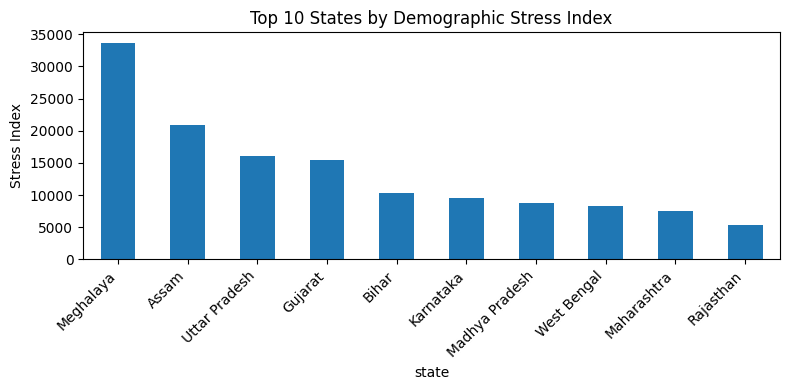

In [ ]:
top_10_states.plot(
    kind='bar',
    figsize=(8,4),
    title='Top 10 States by Demographic Stress Index'
)

plt.ylabel('Stress Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


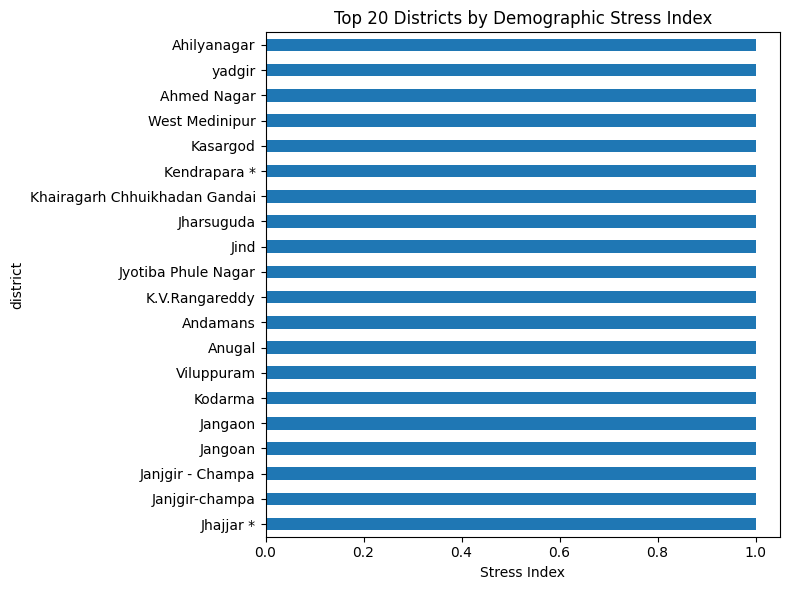

In [ ]:
top_20_districts.plot(
    kind='barh',
    figsize=(8,6),
    title='Top 20 Districts by Demographic Stress Index'
)

plt.xlabel('Stress Index')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


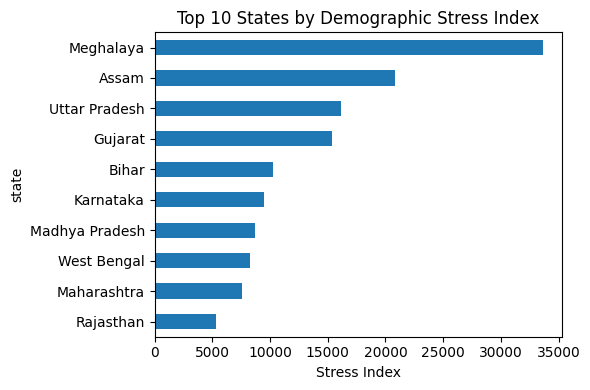

In [ ]:
top_10_states.plot(
    kind='barh',
    figsize=(6,4),
    title='Top 10 States by Demographic Stress Index'
)

plt.xlabel('Stress Index')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
top_10_states = (
    df.groupby('state')['stress_index']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)


In [ ]:
pincode_age = df.groupby('pincode')[age_cols].mean()


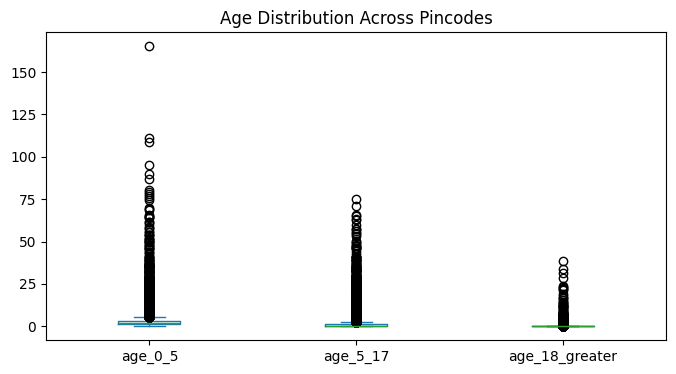

In [ ]:
pincode_age.plot(
    kind='box',
    figsize=(8,4),
    title='Age Distribution Across Pincodes'
)

plt.show()


In [ ]:
df['child_risk'] = df['age_0_5'] / df['total_population'].replace(0, np.nan)


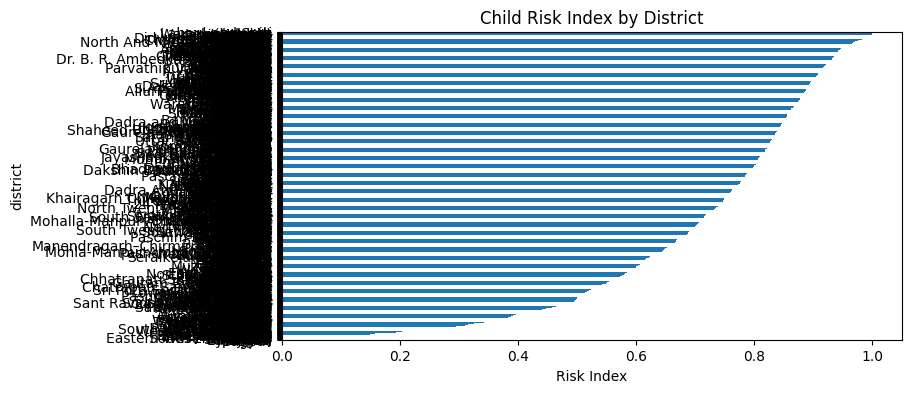

In [ ]:
df.groupby('district')['child_risk'].mean().sort_values().plot(
    kind='barh',
    figsize=(8,4),
    title='Child Risk Index by District'
)

plt.xlabel('Risk Index')
plt.show()


In [ ]:
df['child_risk'] = (
    df['age_0_5'] /
    (df['age_0_5'] + df['age_5_17'] + df['age_18_greater']).replace(0, np.nan)
)


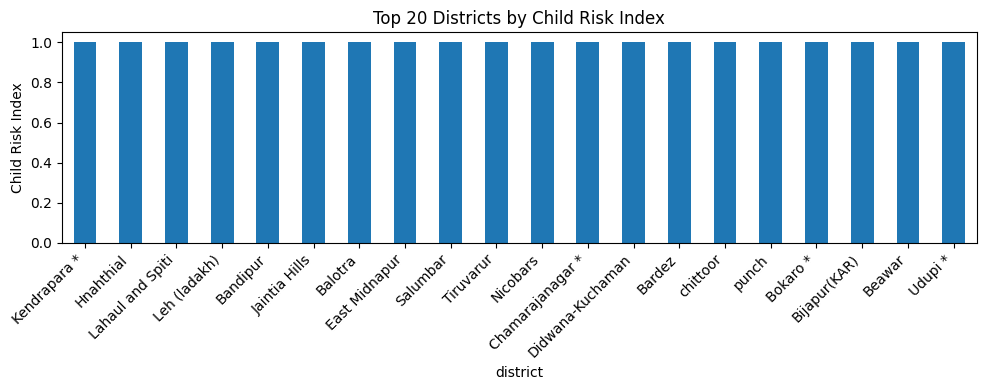

In [ ]:
top_20_districts_child_risk = (
    df.groupby('district')['child_risk']
      .mean()
      .sort_values(ascending=False)
      .head(20)
)

top_20_districts_child_risk.plot(
    kind='bar',
    figsize=(10,4),
    title='Top 20 Districts by Child Risk Index'
)

plt.ylabel('Child Risk Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


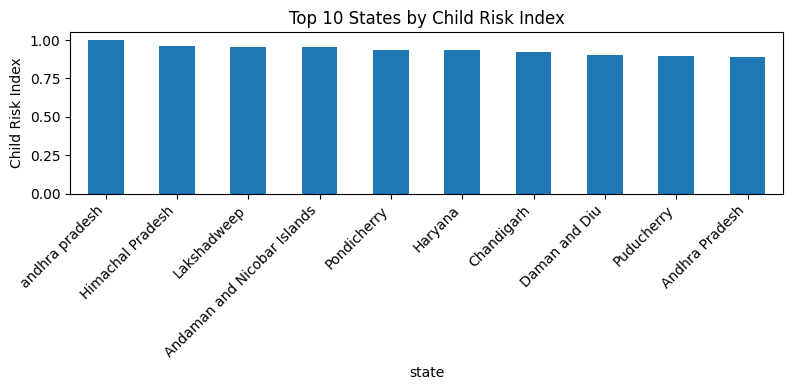

In [ ]:
top_10_states_child_risk = (
    df.groupby('state')['child_risk']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

top_10_states_child_risk.plot(
    kind='bar',
    figsize=(8,4),
    title='Top 10 States by Child Risk Index'
)

plt.ylabel('Child Risk Index')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
df['future_workforce_gap'] = df['age_18_greater'] - df['age_5_17']


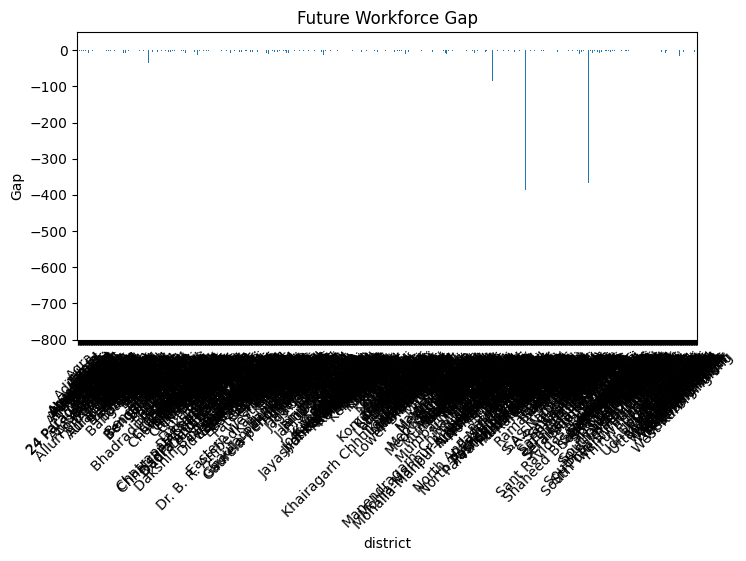

In [ ]:
df.groupby('district')['future_workforce_gap'].mean().plot(
    kind='bar',
    figsize=(8,4),
    title='Future Workforce Gap'
)

plt.ylabel('Gap')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.to_csv('aadhar_demographic_policy_insights.csv', index=False)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
ts = df.groupby('date')['age_18_greater'].sum().sort_index()
ts = ts.reset_index()
ts.head()


,date,age_18_greater
0,2025-03-02,37
1,2025-03-09,590
2,2025-03-15,831
3,2025-03-20,1394
4,2025-03-23,179


In [ ]:
scaler = MinMaxScaler()
ts['scaled'] = scaler.fit_transform(ts[['age_18_greater']])


In [ ]:
def create_sequences(data, window=3):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(ts['scaled'].values, window=3)

X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y, epochs=50, verbose=1)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0236
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0240
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0321
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0276
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0293
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0248
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0231
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0228
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0199
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0214
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0189
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0220
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0273
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0185
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0192
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━

In [ ]:
future_steps = 6
last_seq = X[-1]

future_preds = []

for _ in range(future_steps):
    pred = model.predict(last_seq.reshape(1, -1, 1), verbose=0)
    future_preds.append(pred[0,0])
    last_seq = np.append(last_seq[1:], pred).reshape(-1,1)

future_preds = scaler.inverse_transform(
    np.array(future_preds).reshape(-1,1)
)


/tmp/ipython-input-347798026.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(ts['date'].iloc[-1], periods=7, freq='M')[1:],


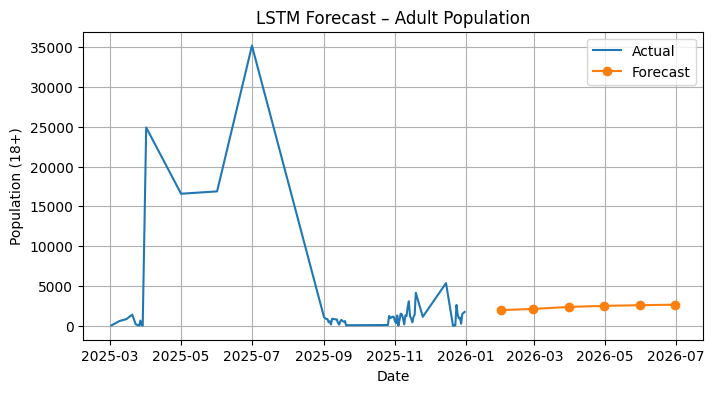

In [ ]:
plt.figure(figsize=(8,4))

plt.plot(ts['date'], ts['age_18_greater'], label='Actual')
plt.plot(
    pd.date_range(ts['date'].iloc[-1], periods=7, freq='M')[1:],
    future_preds,
    marker='o',
    label='Forecast'
)

plt.title('LSTM Forecast – Adult Population')
plt.xlabel('Date')
plt.ylabel('Population (18+)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
district_metrics = df.groupby('district').agg({
    'age_0_5': 'sum',
    'age_5_17': 'sum',
    'age_18_greater': 'sum'
})

district_metrics['stress_index'] = (
    district_metrics['age_0_5'] + district_metrics['age_5_17']
) / (
    district_metrics.sum(axis=1)
)


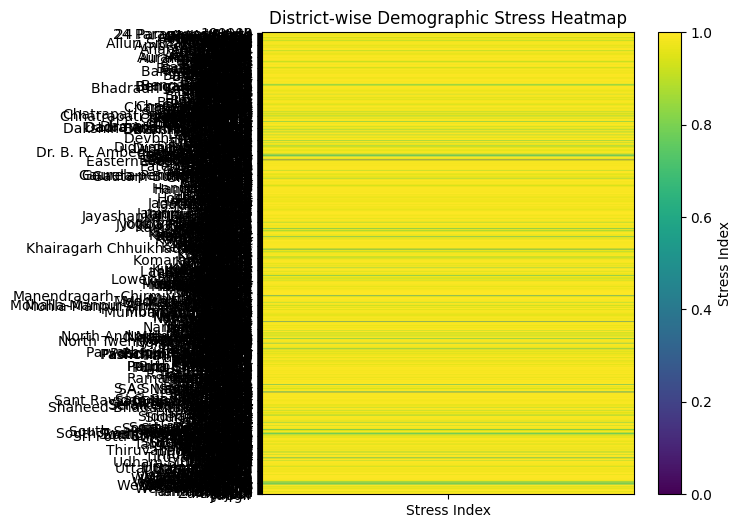

In [ ]:
heatmap_data = district_metrics[['stress_index']]

plt.figure(figsize=(6,6))
plt.imshow(heatmap_data, aspect='auto')

plt.colorbar(label='Stress Index')
plt.yticks(
    range(len(heatmap_data.index)),
    heatmap_data.index
)

plt.xticks([0], ['Stress Index'])
plt.title('District-wise Demographic Stress Heatmap')
plt.show()


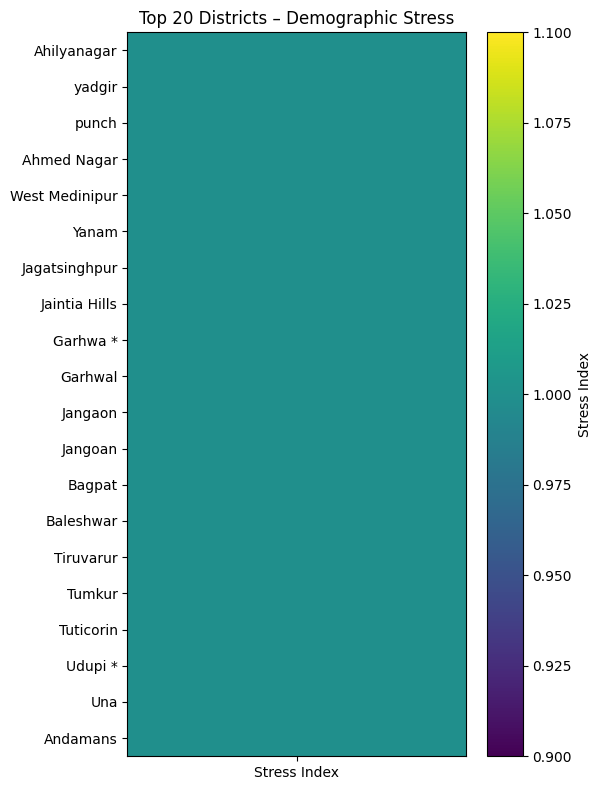

In [ ]:
top_n = 20

heatmap_data = district_metrics[['stress_index']] \
    .sort_values('stress_index', ascending=False) \
    .head(top_n)

plt.figure(figsize=(6,8))
plt.imshow(heatmap_data, aspect='auto')

plt.colorbar(label='Stress Index')

plt.yticks(
    range(len(heatmap_data.index)),
    heatmap_data.index
)

plt.xticks([0], ['Stress Index'])
plt.title(f'Top {top_n} Districts – Demographic Stress')
plt.tight_layout()
plt.show()


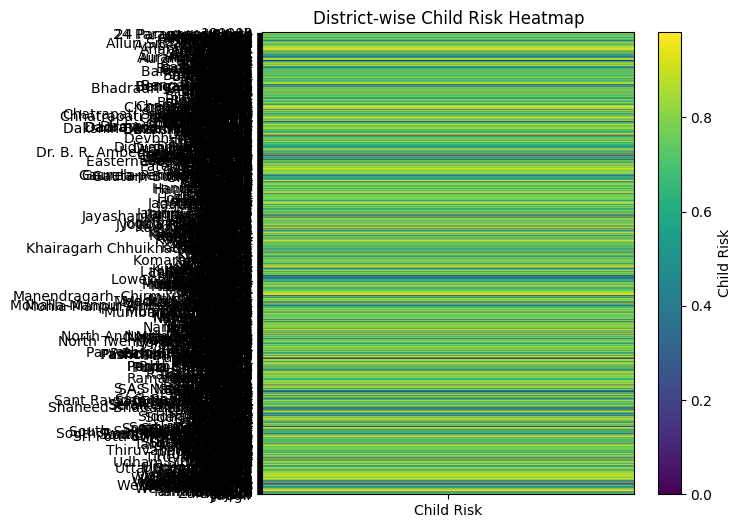

In [ ]:
district_metrics['child_risk'] = (
    district_metrics['age_0_5'] /
    district_metrics.sum(axis=1)
)

plt.figure(figsize=(6,6))
plt.imshow(district_metrics[['child_risk']], aspect='auto')

plt.colorbar(label='Child Risk')
plt.yticks(
    range(len(district_metrics.index)),
    district_metrics.index
)

plt.xticks([0], ['Child Risk'])
plt.title('District-wise Child Risk Heatmap')
plt.show()


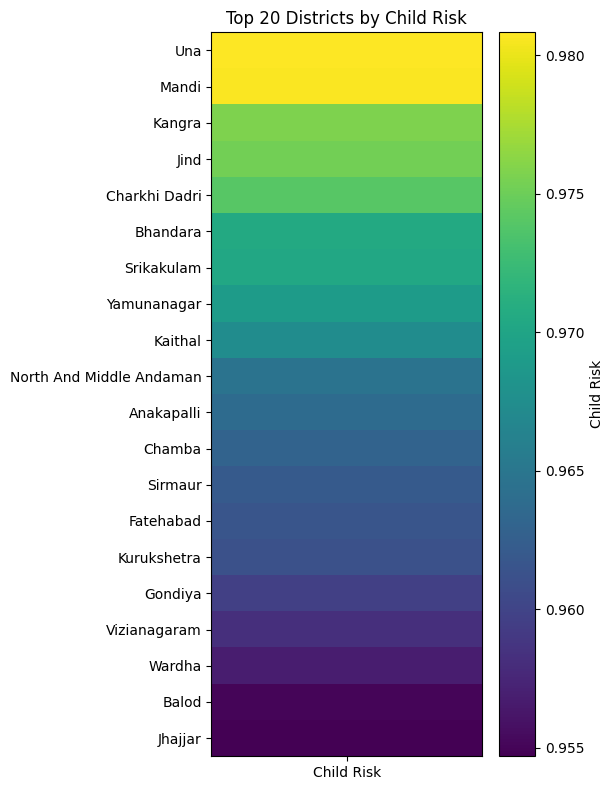

In [ ]:
# Sort districts by child risk (descending)
top_n = 20

heatmap_df = district_metrics[['child_risk']] \
    .sort_values('child_risk', ascending=False) \
    .head(top_n)

plt.figure(figsize=(6,8))
plt.imshow(heatmap_df, aspect='auto')

plt.colorbar(label='Child Risk')

plt.yticks(
    range(len(heatmap_df.index)),
    heatmap_df.index
)

plt.xticks([0], ['Child Risk'])
plt.title(f'Top {top_n} Districts by Child Risk')
plt.tight_layout()
plt.show()
